In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from minority_report.clean_data import CleanData
from minority_report.scaling import Scaling
from datetime import datetime, timedelta
from geopandas import GeoSeries
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load data

In [2]:
df = Scaling()
df.load_data()

,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,suspect_race,suspect_sex,latitude,longitude,metro,victim_age,victim_race,victim_sex,period,borough,patrol_borough
0,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,BLACK,M,40.664239,-73.908425,NOT SUBWAY,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH
1,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.644590,-73.892672,NOT SUBWAY,45-64,BLACK,F,2012-03-17 10:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
2,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,BLACK,M,40.658758,-73.942435,NOT SUBWAY,18-24,BLACK,M,2016-10-27 13:00:00,BROOKLYN,PATROL BORO BKLYN SOUTH
3,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,M,40.722364,-73.851474,NOT SUBWAY,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH
4,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.793465,-73.968950,NOT SUBWAY,45-64,WHITE,F,2013-12-11 13:00:00,MANHATTAN,PATROL BORO MAN NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983202,109,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,WHITE HISPANIC,M,40.785050,-73.856852,NOT SUBWAY,25-44,ASIAN / PACIFIC ISLANDER,F,2018-12-02 04:00:00,QUEENS,PATROL BORO QUEENS NORTH
6983203,25,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,BLACK,F,40.801717,-73.937283,NOT SUBWAY,25-44,BLACK,M,2018-01-20 00:00:00,MANHATTAN,PATROL BORO MAN NORTH
6983204,41,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,FRONT OF,STREET,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,UNKNOWN,40.814612,-73.903637,NOT SUBWAY,25-44,BLACK HISPANIC,F,2018-08-03 22:00:00,BRONX,PATROL BORO BRONX
6983205,107,FRAUDS,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,UNKNOWN,U,40.724699,-73.808549,NOT SUBWAY,18-24,ASIAN / PACIFIC ISLANDER,M,2018-12-10 11:00:00,QUEENS,PATROL BORO QUEENS SOUTH


In [3]:
sample = df.data[['period', 'latitude', 'longitude']]

In [ ]:
sample

In [ ]:
inf = sample['period'] > datetime(2013, 7, 1, 0, 0, 0)
sup = sample['period'] < datetime(2013, 8, 1, 0, 0, 0)

In [ ]:
interval = sample[inf & sup]
interval

In [ ]:
liste = np.sort(np.array(interval['period'].unique()))
    
lat_per_image = []
lon_per_image = []
length = len(liste)

In [ ]:
for index, timestamp in enumerate(liste[:2]):
    if (index+1) % 10 ==0:
        print(f'Grouping timestamp {index+1}/{length}')
    by_hour = np.array(interval[interval['period']== timestamp][['latitude', 'longitude']])
    #print(by_hour)
    lat_per_image.append([coord[0] for coord in by_hour])
    lon_per_image.append([coord[1] for coord in by_hour])
    
lat_per_image

In [ ]:
interval.resample('hour')

In [ ]:
from datetime import datetime

def group_by_hour_list(df, year, month, day):#, sampling=True):
    '''
    get a sample of a month-time crimes grouped by hour
    inputs = start_date info
    '''
    sample = df.data[['period', 'latitude', 'longitude']]
    
    #if sampling:
    inf = sample['period'] > datetime(year, month, day, 0, 0, 0)
    next_month = month+1
    next_year = year
    if month == 12:
        next_month = 1
        next_year = year+1
    #print(next_year, next_month)
    sup = sample['period'] < datetime(next_year, next_month, day, 0, 0, 0)
    sample = sample[ inf & sup ]
    
    liste = np.sort(np.array(sample['period'].unique()))
    length = len(liste)
    lat_per_image = [[coord[1] for coord in np.array(sample[sample['period']== timestamp][['latitude', 'longitude']])]\
             for index, timestamp in enumerate(liste)]
    lon_per_image = [[coord[0] for coord in np.array(sample[sample['period']== timestamp][['latitude', 'longitude']])]\
             for index, timestamp in enumerate(liste)]
    
    return lat_per_image, lon_per_image



In [ ]:
lats, lons = group_by_hour_list(df, 2013, 8, 5)#, sampling=False)

In [ ]:
print(df.data['longitude'].min(), df.data['longitude'].max())

# Explore data

In [4]:
from datetime import datetime

def group_by_hour(df, year, month, day):#, sampling=True):
    '''
    get a sample of a month-time crimes grouped by hour
    inputs = start_date info
    '''
    sample = df.data[['period', 'latitude', 'longitude']]
    
    #if sampling:
    inf = sample['period'] > datetime(year, month, day, 0, 0, 0)
    next_month = month+1
    next_year = year
    if month == 12:
        next_month = 1
        next_year = year+1
    #print(next_year, next_month)
    sup = sample['period'] < datetime(next_year, next_month, day, 0, 0, 0)
    sample = sample[ inf & sup ]
    
    liste = np.sort(np.array(sample['period'].unique()))
    length = len(liste)
    lat_per_image = []
    lon_per_image = []
    for index, timestamp in enumerate(liste):
        if (index+1) % 100 ==0:
            print(f'Grouping timestamp {index+1}/{length}')
        by_hour = np.array(sample[sample['period']== timestamp][['latitude', 'longitude']])
        lat_per_image.append([coord[0] for coord in by_hour])
        lon_per_image.append([coord[1] for coord in by_hour])
    return lat_per_image, lon_per_image

In [5]:
lats, lons = group_by_hour(df, 2013, 8, 5)#, sampling=False)

Grouping timestamp 100/743
Grouping timestamp 200/743
Grouping timestamp 300/743
Grouping timestamp 400/743
Grouping timestamp 500/743
Grouping timestamp 600/743
Grouping timestamp 700/743


In [ ]:
len(lons)

In [ ]:
len(lats)

In [ ]:
lons

In [ ]:
lats

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(lats[0], lons[0])

In [ ]:
#latitude max-min de NYC
40.934109, -74.051895 (NW)
40.530765, -73.744835 (SE)

#faire un maillage de NYC
40.763934, -73.976322 to 

In [ ]:
(40.934109 - 40.530765)/-0.00045 #latitude

In [ ]:
(-73.673232--74.051895)/0.006179099999999771  #longitude

In [ ]:
#BOUNDS
from shapely.geometry import Polygon
import numpy as np
points = gdf # for one image
xmin, ymax = 40.887224, -74.261419 #(NW) 
xmax, ymin = 40.530765, -73.744835 #(SE)

In [ ]:
#import geopandas
#from geopandas import GeoDataFrame, GeoSeries
#import matplotlib.pyplot as plt
#from matplotlib.colors import Normalize
#import matplotlib.cm as cm
#%matplotlib inline
#import seaborn as sns
#from shapely.geometry import Point, Polygon
#import numpy as np
#import googlemaps
#from datetime import datetime
#plt.rcParams["figure.figsize"] = [8,6]

# Get the shape-file for NYC
#boros = GeoDataFrame.from_file('../raw_data/geo_export_b18517e0-34fa-4296-ba66-861a5dbbd96d.sh')
#boros = boros.set_index('boro_code')
#boros = boros.sort_index()

# Plot and color by borough
#boros.plot(column = 'boro_name')

# Get rid of are that you aren't interested in (too far away)
#plt.gca().set_xlim([-74.05, -73.85])
#plt.gca().set_ylim([40.65, 40.9])

# make a grid of latitude-longitude values
#xmin, xmax, ymin, ymax = -74.05, -73.85, 40.65, 40.9
#xx, yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
#xc = xx.flatten()
#yc = yy.flatten()

# Now convert these points to geo-data
#pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
#in_map =  np.array([pts.within(geom) for geom in boros.geometry]).sum(axis=0)
#pts = GeoSeries([val for pos,val in enumerate(pts) if in_map[pos]])

# Plot to make sure it makes sense:
#pts.plot(markersize=1)

In [ ]:
#import geopandas
#from geopandas import GeoDataFrame, GeoSeries
#import matplotlib.pyplot as plt
#from matplotlib.colors import Normalize
#import matplotlib.cm as cm
#%matplotlib inline
#import seaborn as sns
#from shapely.geometry import Point, Polygon
#import numpy as np
#import googlemaps
#from datetime import datetime
#plt.rcParams["figure.figsize"] = [8,6]

#fig, ax = plt.subplots()

# make a grid of latitude-longitude values
#xmin, xmax, ymin, ymax = -74.21, -73.73, 40.530765, 40.887224
#xx, yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
#xc = xx.flatten()
#yc = yy.flatten()

# Now convert these points to geo-data
#pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

# Plot to make sure it makes sense:
#pts.plot(markersize=1, ax=ax)
#geo.plot(ax=ax)

In [6]:
geometry = [Point(xy) for xy in zip(lons[2], lats[2])]
#df_geopandas = sample.drop(['longitude', 'latitude'], axis=1)
gdf = GeoSeries(geometry)

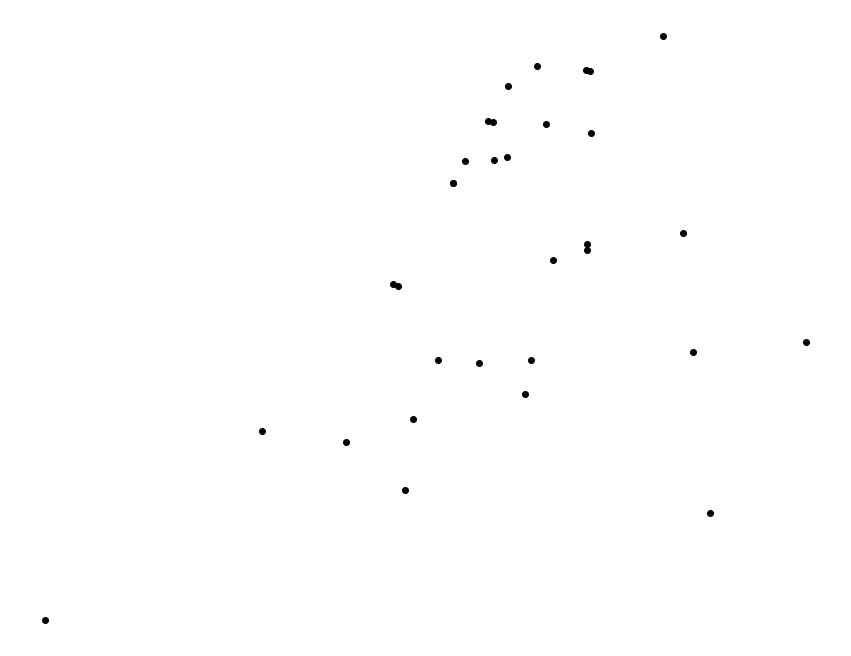

In [7]:
import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
plt.rcParams["figure.figsize"] = [15, 15]


fig, ax = plt.subplots()

# make a grid of latitude-longitude values
xmin, xmax, ymin, ymax = -74.21, -73.73, 40.49611539518921, 40.91553277600008
xx, yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
xc = xx.flatten()
yc = yy.flatten()

# Now convert these points to geo-data
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

# Plot to make sure it makes sense:
#pts.plot(markersize=1, ax=ax)
gdf.plot(ax=ax, color='black')
plt.gca().axison=False

#plt.savefig('../images/test.jpeg')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('../images/image.jpeg', bbox_inches=extent)

In [ ]:
#from matplotlib.image import imread

#img = imread('../images/test.jpeg', 0)
#img.shape

In [8]:
from skimage import io
img = io.imread('../images/image.jpeg', as_gray=False)

In [9]:
img.shape

(642, 837, 3)

In [ ]:
np.unique(img)

In [ ]:
plt.imshow(img)

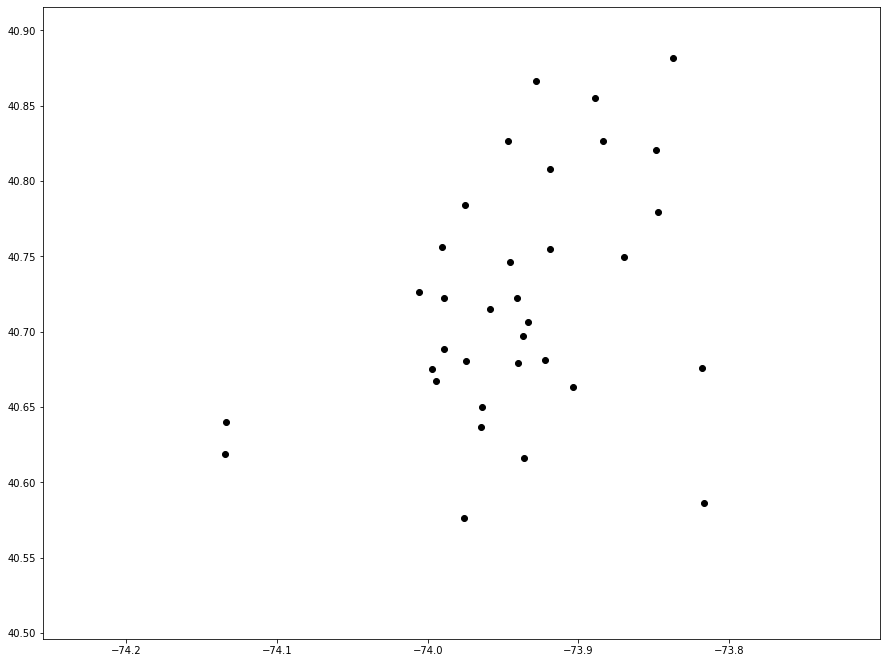

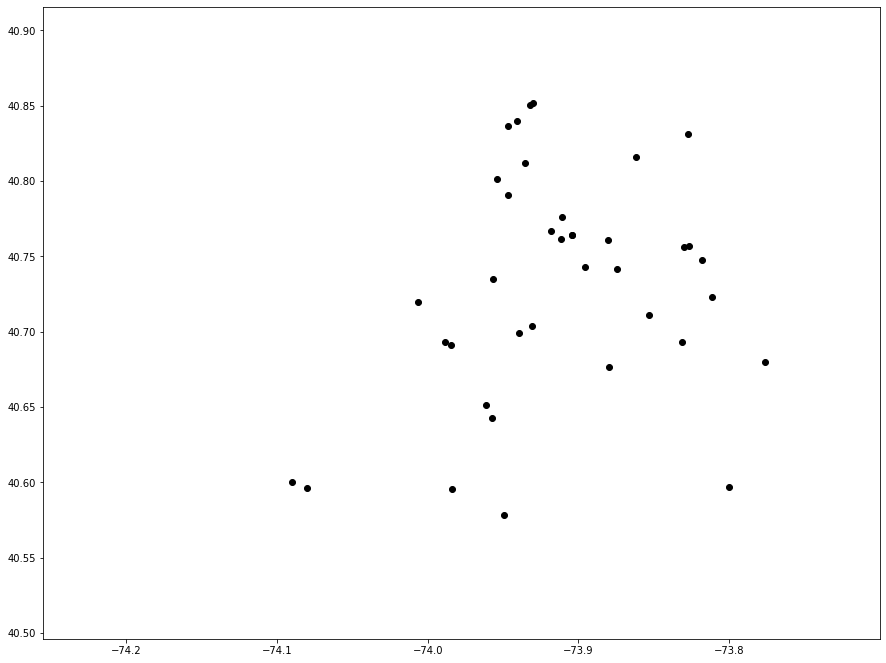

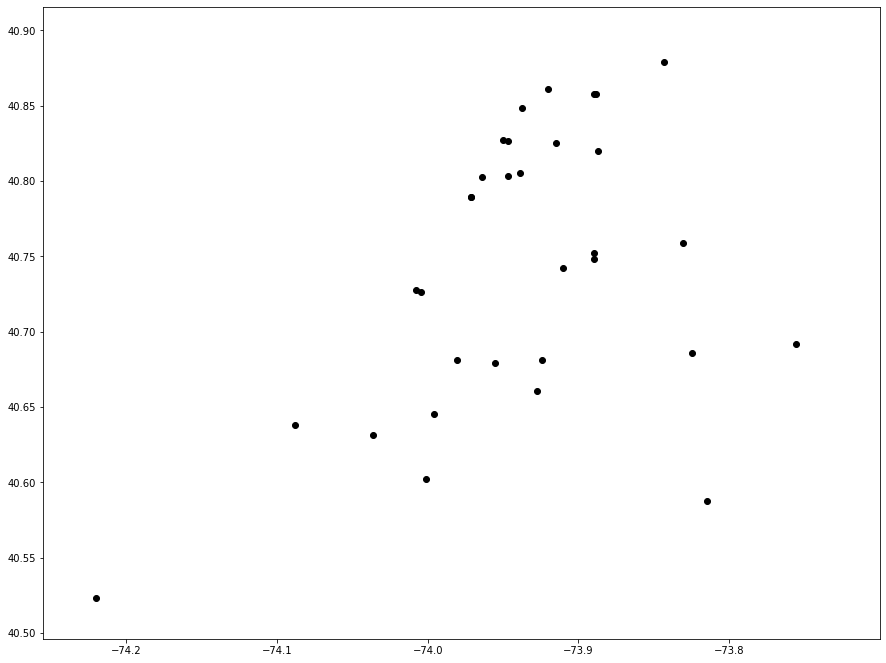

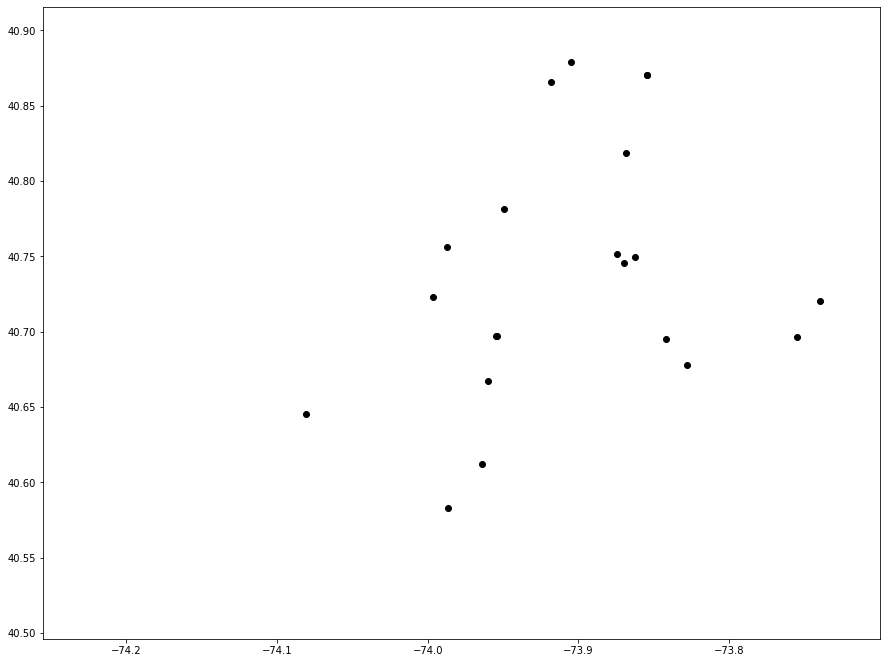

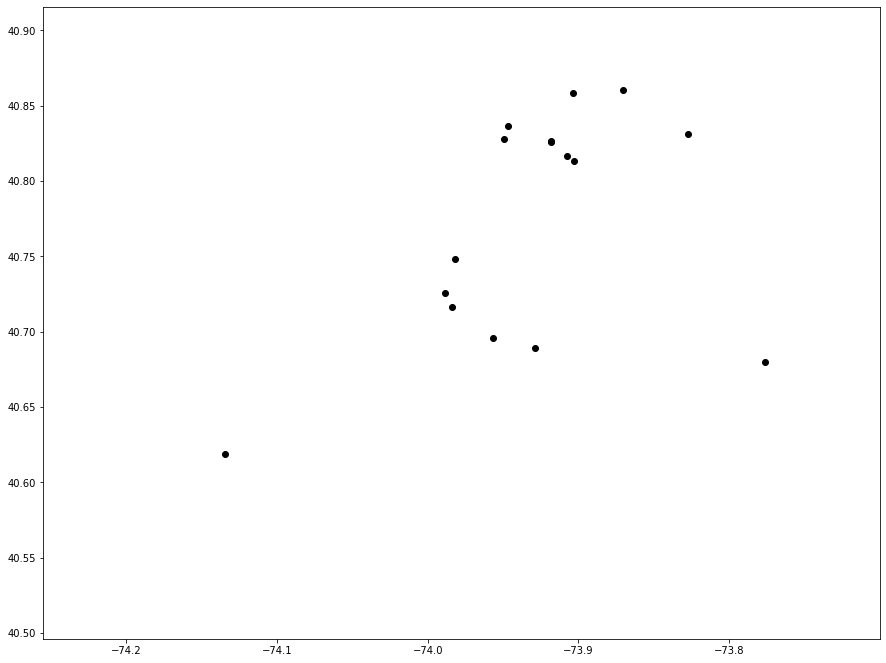

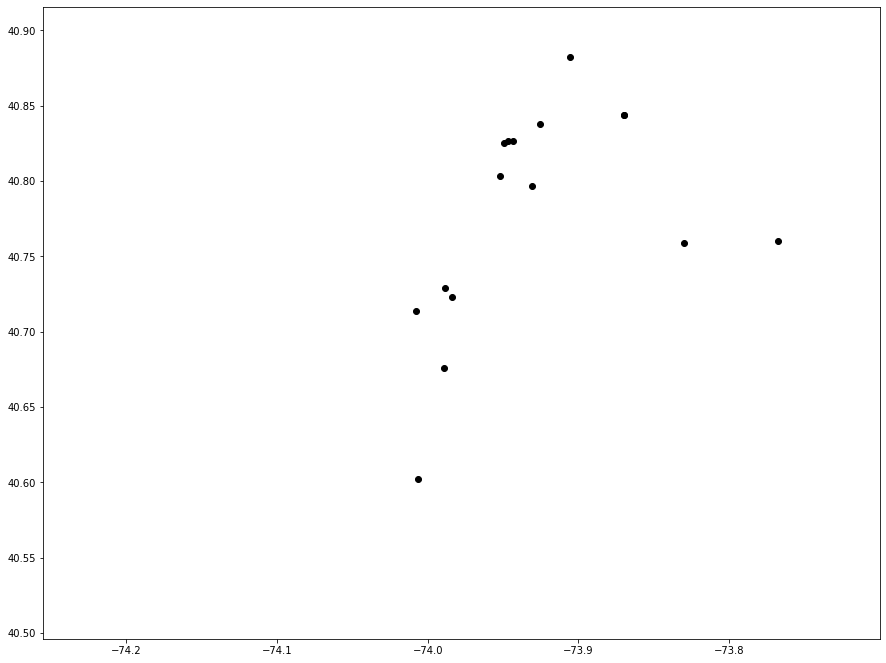

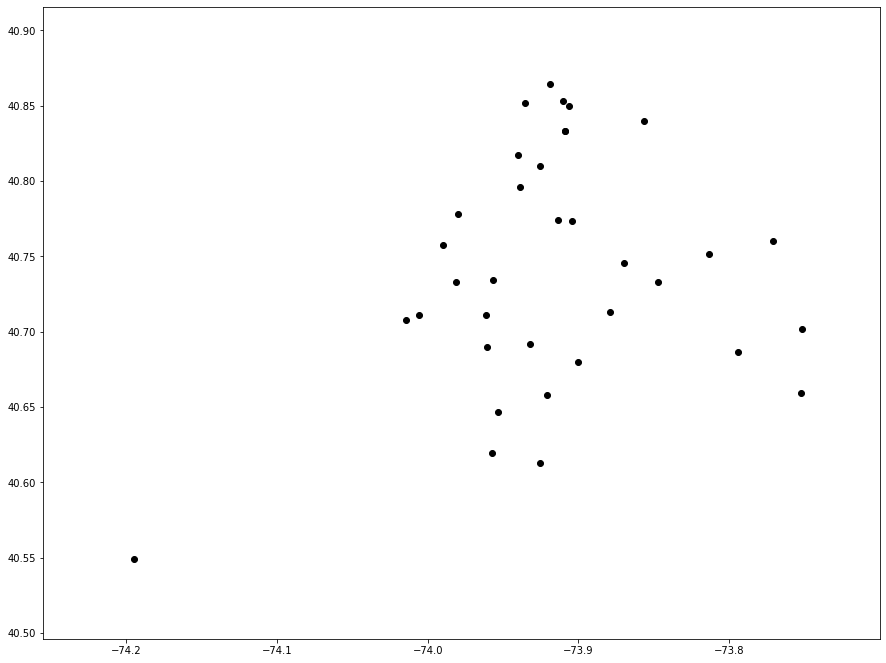

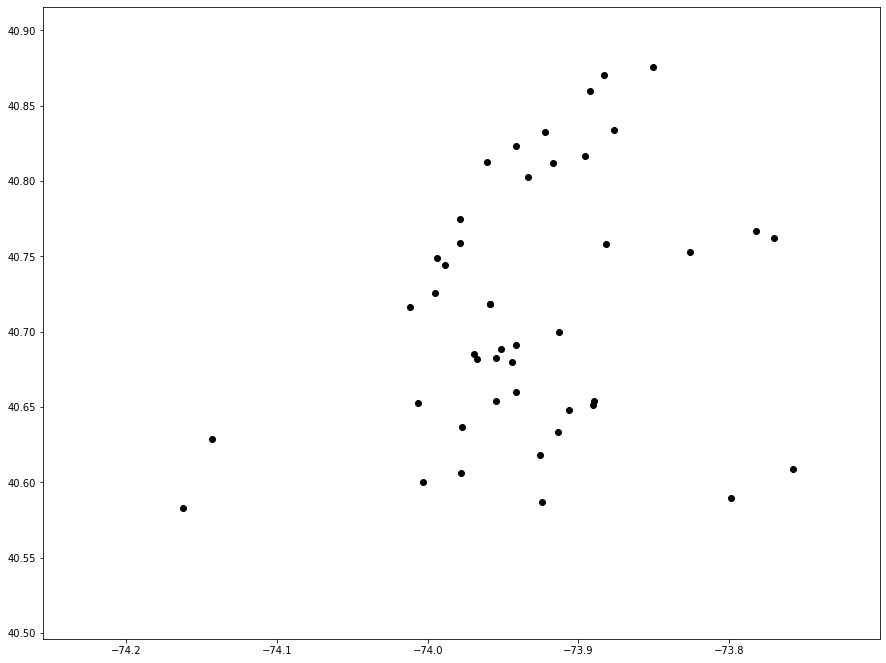

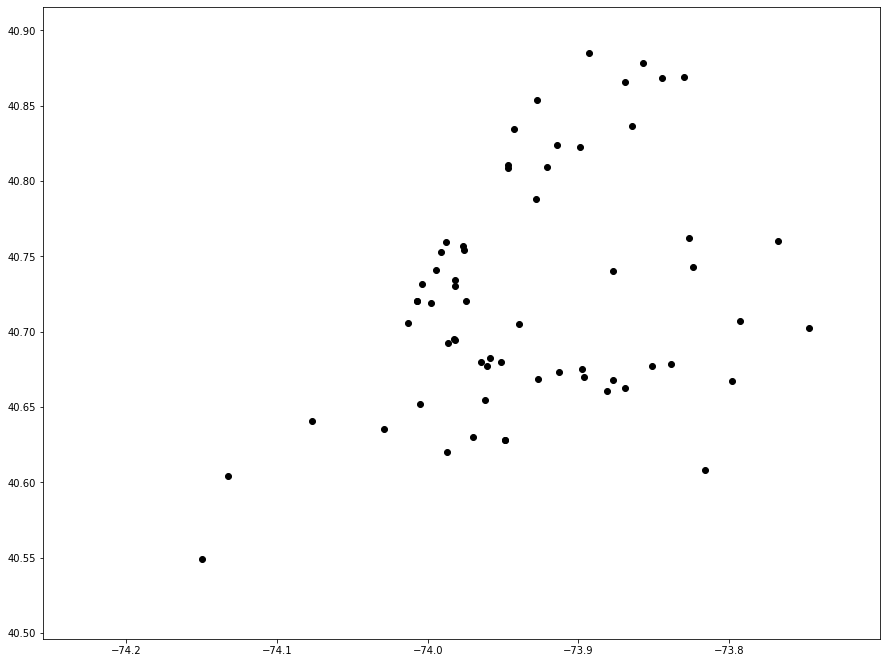

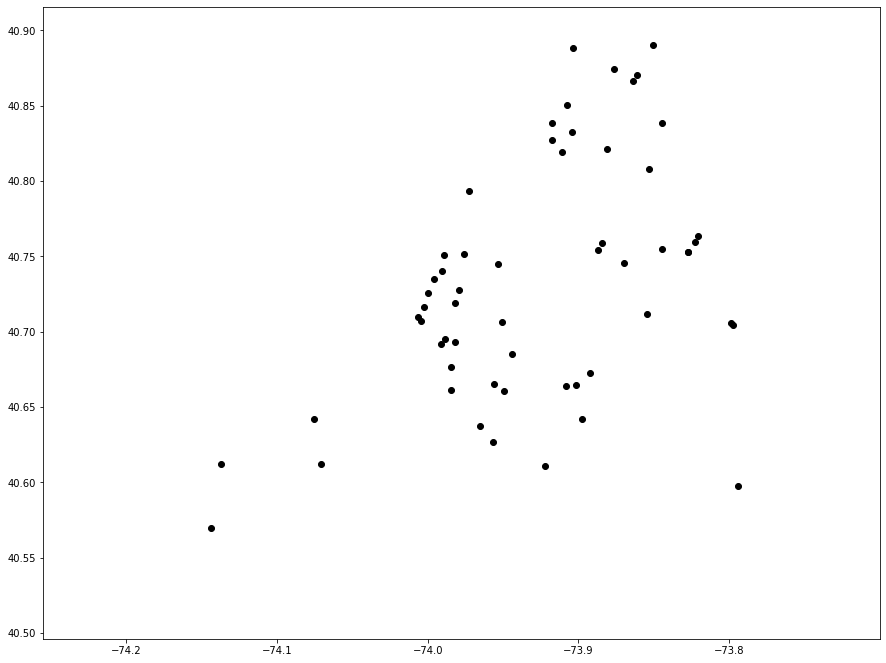

In [42]:
import geopandas
from geopandas import GeoDataFrame, GeoSeries
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from shapely.geometry import Point, Polygon
import numpy as np
import googlemaps
from datetime import datetime
from skimage import io
plt.rcParams["figure.figsize"] = [15, 15]

img_list = []
for i in range (10):
    geometry = [Point(xy) for xy in zip(lons[i], lats[i])]
    gdf = GeoSeries(geometry)
    
    fig, ax = plt.subplots()

    # make a grid of latitude-longitude values
    #xmin, xmax, ymin, ymax = -74.25559136315213, -73.70000906387347, 40.49611539518921, 40.91553277600008
    #xx, yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
    #xc = xx.flatten()
    #yc = yy.flatten()

    # Now convert these points to geo-data
    #pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

    # Plot to make sure it makes sense:
    #pts.plot(markersize=1, ax=ax)
    #ax.axison=False
    ax.set_xlim(left=-74.25559136315213, right=-73.70000906387347)
    ax.set_ylim(bottom = 40.49611539518921, top=40.91553277600008)
    
    gdf.plot(ax=ax, color='black')
    
    #save plot
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('../images/image.jpeg', bbox_inches=extent)
    #read plot as np.array
    img = io.imread('../images/image.jpeg')
    # add np.array to list
    img_list.append(img)
img_list = np.array(img_list)

In [43]:
img_list.shape

(10, 631, 837, 3)

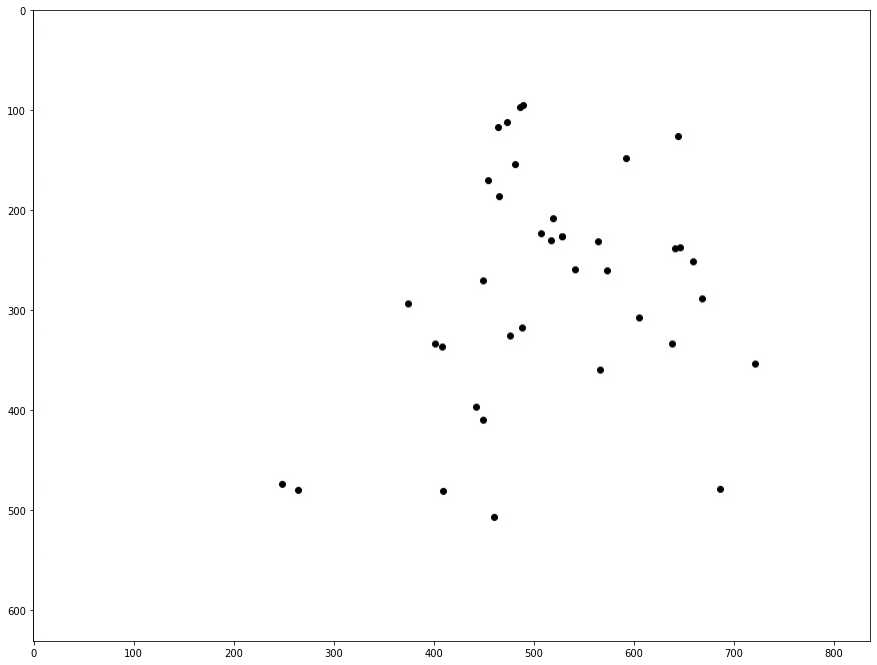

In [44]:
plt.imshow(img_list[1])

# Get boundaries

In [20]:
import pandas as pd

In [21]:
boundaries = pd.read_csv('../raw_data/nybb.csv')

In [ ]:
boundaries

In [ ]:
boundaries['the_geom'][0]

In [ ]:
bounds = boudaries['the_geom'][0].replace('MULTIPOLYGON','')\
                                .replace('(','')\
                                .replace(')','')\
                                .strip().\
                                replace(' ',',')\
                                .split(',')
bound

In [ ]:
coords = [float(element) for element in bound if element != '']
coords

In [ ]:
latitude = []
longitude = []
for element in coords:
    if element > 0:
        latitude.append(element)
    else:
        longitude.append(element)
print(min(latitude), max(latitude))
print(min(longitude), max(longitude))

In [13]:
def get_local_min_max(coords):
    
    latitude = []
    longitude = []
    for element in coords:
        if element > 0:
            latitude.append(element)
        else:
            longitude.append(element)
    min_max_lat = [min(latitude), max(latitude)]
    min_max_lon = [min(longitude), max(longitude)]
    return min_max_lat, min_max_lon

In [14]:
def compare_lon_lat(lat, lon, best_lat, best_lon):
    #print(lat, best_lat)
    if lat[0] < best_lat[0]:
        best_lat[0] = lat[0]
    if lat[1] > best_lat[1]:
        best_lat[1] = lat[1]
    if lon[0] < best_lon[0]:
        best_lon[0] = lon[0]
    if lon[1] > best_lon[1]:
        best_lon[1] = lon[1]
    return best_lat, best_lon

In [15]:
def absolute_min_max(boundaries):
    best_lat = [0,0]
    best_lon = [0,0]
    for borough in range(boundaries.shape[0]):
        bounds = boundaries['the_geom'][borough].replace('MULTIPOLYGON','')\
                                .replace('(','')\
                                .replace(')','')\
                                .strip().\
                                replace(' ',',')\
                                .split(',')
        coords = [float(element) for element in bounds if element != '']
        lat, lon = get_local_min_max(coords)
        #import ipdb ; ipdb.set_trace()
        if (best_lat == [0,0]) & (best_lon ==[0,0]):
            best_lat = lat
            best_lon = lon
        else:
            best_lat, best_lon = compare_lon_lat(lat, lon, best_lat, best_lon)
    return best_lat, best_lon

In [22]:
absolute_min_max(boundaries)

([40.49611539518921, 40.91553277600008],
 [-74.25559136315213, -73.70000906387347])